# k-Means Clustering

In [2]:
#import all relevant libraries here.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



## k-Means at a glance

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

# Star Wars Galaxy

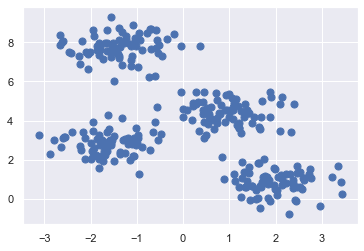

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# Your code
Use  the cells below to implement Kmeans from scratch. Break down the entire problem into smaller subsets. For example, **using pseudocode**

For example: 

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 
   
In order to practice the concepts taught in the lecture by Antonio... **Try to implement it using a class**!

*Tip: Common Kmeans intialization problems have to do with the seed. Try to initiate it several times!*

In [25]:
m=X.shape[0]
n=X.shape[1] 
n_iter=50

In [26]:
K=4
import random

# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 

# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

In [27]:
output={}

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance between for each centroid
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

In [28]:
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

In [29]:
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

Text(0.5, 1.0, 'Original Dataset')

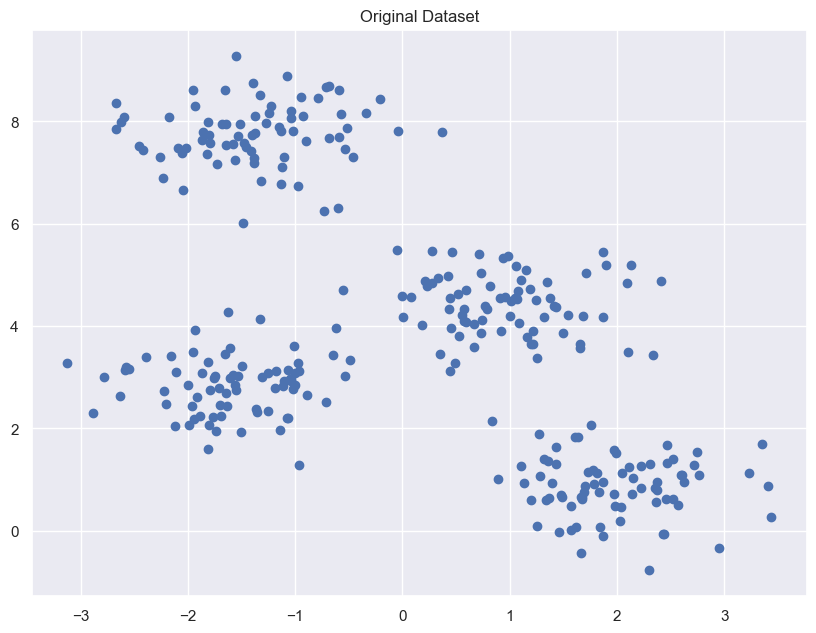

In [30]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

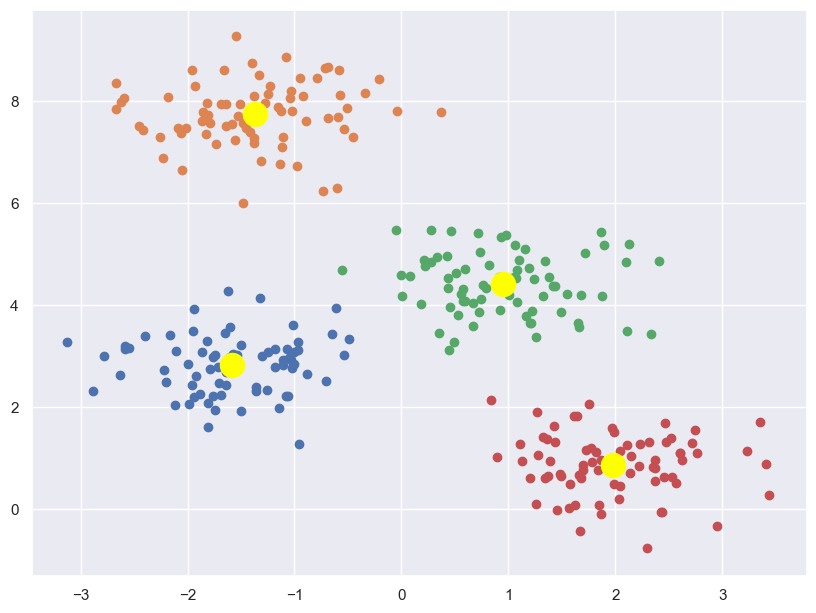

In [31]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

# Ideal Result
You should be able to obtain similar results as the K-means algorithm for the SkLearn library. 
- Compare how well you classify! 
- Justify why you pick X clusters, since you technically shouldn´t know the answer. 

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

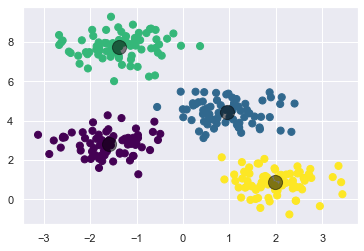

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# BONUS Dataset: Tatooine Map
Now, time to do it for **any dimension of n_features** of X

In [21]:
# Generate sample data with 5 features
n_samples = 4000
n_components = 4
n_features = 5

X, y_true = make_blobs(n_samples=n_samples,
                       n_features = n_features,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X = X[:, ::-1]

df= pd.DataFrame(X)
df

,0,1,2,3,4
0,-1.506390,-0.057663,1.643606,4.426560,0.564538
1,-9.304401,7.410423,2.634051,1.421497,6.529532
2,-2.874097,2.395984,1.424139,3.999277,0.486795
3,-1.747953,0.712163,0.784197,4.408828,0.959651
4,-1.409234,8.909214,7.602814,-0.969191,2.647356
...,...,...,...,...,...
3995,-3.124214,9.833733,7.872693,-1.033497,2.852330
3996,-3.138745,9.688679,7.624227,-1.525713,3.853165
3997,-1.284945,0.625381,1.833122,4.583487,0.905785
3998,-2.542347,-0.165675,2.671166,5.036737,0.871050


# Your Code
- You can do it with Kmeans right away but...
- Can you also implement K-means ++?
- What about PCA + Kmeans?

Compute the execution time for each! 
- Which is faster? 
- Which is more accurate?

# Ideal Result

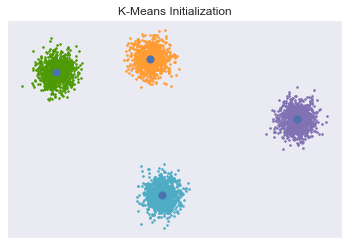

In [23]:
# Calculate seeds from kmeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

cluster_data = kmeans.cluster_centers_
centers_init = kmeans.cluster_centers_
# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    # note that this is a plot only in two dimensions
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means Initialization")
plt.xticks([])
plt.yticks([])
plt.show()